In [16]:
import pandas as pd
import numpy as np
from pandas_datareader import data
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib notebook

#download data into DataFrame and create moving averages columns
df = data.DataReader('AAPL', 'yahoo', start='1/1/2014', end='1/1/2016')

In [17]:
#Granville believed that when volume increases sharply without a significant change in the stock's price
#the price will eventually jump upward or fall downward.
df['OBV'] = np.nan
df['OBV'][0] = 0

In [18]:
for i in range(1, len(df['Close'])):
    if df['Close'][i] > df['Close'][i-1]:
        df['OBV'][i] = df['OBV'][i-1] + df['Volume'][i]
    elif df['Close'][i] < df['Close'][i-1]:
        df['OBV'][i] = df['OBV'][i-1] - df['Volume'][i]
    else:
        df['OBV'][i] = df['OBV'][i-1]

<IPython.core.display.Javascript object>


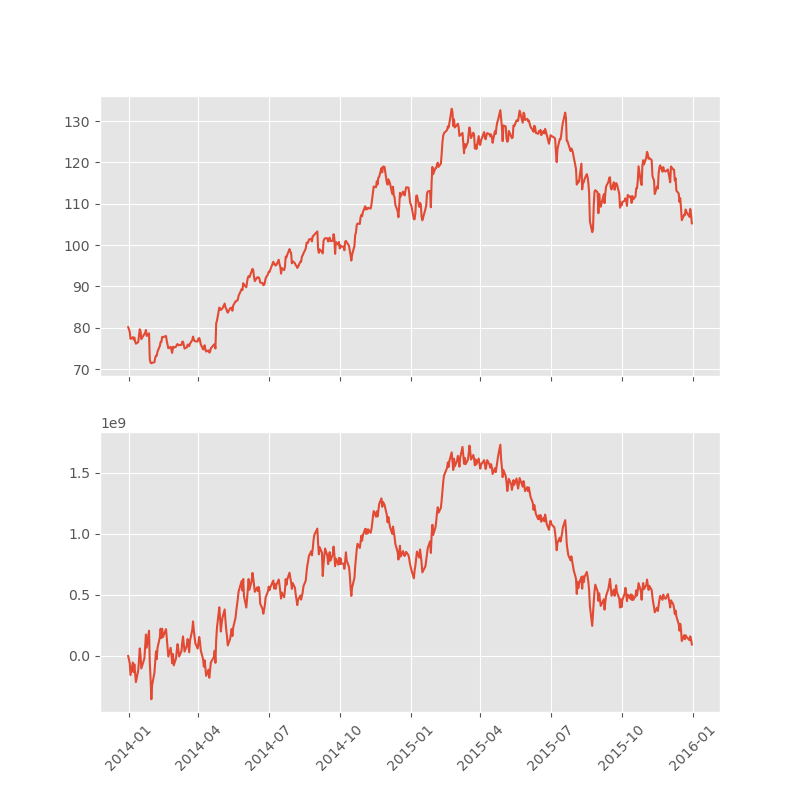

In [19]:
%matplotlib notebook
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(8,8))
ax1.plot(df.index, df['Close'])
ax2.plot(df.index, df['OBV'])
plt.xticks(rotation=45)

plt.show()

In [ ]:
df.tail(30)